<a href="https://colab.research.google.com/github/HodaMemar/A3/blob/main/Pivot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
import seaborn as sns

ساختار فایل ورودی در این مرحله

In [3]:
filename="/content/drive/MyDrive/PaperA3/CUI/CUI__0.csv"
df=pd.read_csv(filename)
df

,Unnamed: 0,HADM_ID,title_span,category_Inner,negex,entity_text,first_cuid,canonical_name,label,CATEGORY,DRG_CODE,GENDER,AGE,CHARTDATE,TAA
0,0,157267,Allergies:,allergies,False,Codeine,C0009214,codeine,CHEMICAL,Discharge summary,391,F,76,2124-09-28 00:00:00,9
1,1,157267,CC:,chief_complaint,False,Emesis,C0042963,Vomiting,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
2,2,157267,CC:,chief_complaint,False,diarrhea,C0011991,Diarrhea,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
3,3,157267,CC:,chief_complaint,False,fever,C0015967,Fever,DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
4,4,157267,HPI:,history_of_present_illness,False,ESRD,C0022661,"Kidney Failure, Chronic",DISEASE,Discharge summary,391,F,76,2124-09-28 00:00:00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,99545,186138,Neuro:,neurological,False,solumedrol,C0701466,Solu-Medrol,CHEMICAL,Nursing/other,166,M,66,2195-11-22 00:00:00,29
99546,99546,186138,NaN,NaN,False,FIO2,C0428167,Inspired fraction of oxygen,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99547,99547,186138,NaN,NaN,False,acidemia,C0268030,Acidemia,DISEASE,Nursing/other,166,M,66,2195-11-23 00:00:00,30
99548,99548,186138,NaN,NaN,True,PEEP,C0032740,Positive End-Expiratory Pressure,CHEMICAL,Nursing/other,166,M,66,2195-11-23 00:00:00,30


In [4]:
df[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label
0,157267,allergies,False,C0009214,codeine,CHEMICAL
1,157267,chief_complaint,False,C0042963,Vomiting,DISEASE
2,157267,chief_complaint,False,C0011991,Diarrhea,DISEASE
3,157267,chief_complaint,False,C0015967,Fever,DISEASE
4,157267,history_of_present_illness,False,C0022661,"Kidney Failure, Chronic",DISEASE
...,...,...,...,...,...,...
99545,186138,neurological,False,C0701466,Solu-Medrol,CHEMICAL
99546,186138,NaN,False,C0428167,Inspired fraction of oxygen,CHEMICAL
99547,186138,NaN,False,C0268030,Acidemia,DISEASE
99548,186138,NaN,True,C0032740,Positive End-Expiratory Pressure,CHEMICAL


این تابع برای تفاوت قائل شدن بین مفهوم مثبت و منفی است

In [4]:
def negative(x, y):
        if(x ==True):
            r='not_' + y 
        else:
            r=y
        return r             


#First solution : Integrate all CUI_#
---


برای پیوت کردن یک راه این است که همه فایل های مرحله قبل را ابتدا یکی کنیم و بعد 
وارد مرحله پیوت شویم. ولی این کار باعث کندی بسیار زیاد میشود
امکان موازی سازی هم به راحتی فراهم نیست چون عملیات روی تعدادی از رکورد های پانداس است.

این مرحله قبلا انجام شده است و نتیجه آن در آدرس زیر است:

'/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv'


In [6]:
df = pd.DataFrame(columns=['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label'])
df

,HADM_ID,category_Inner,negex,first_cuid,canonical_name,label


In [ ]:


for i in range(0,76):
  filename="/content/drive/MyDrive/PaperA3/CUI/CUI__"+str(i)+".csv"
  if (exists(filename)==True):
          print(df.shape)
          df1=pd.read_csv(filename)
          df1=df1[['HADM_ID','category_Inner','negex','first_cuid','canonical_name','label']]
          df1['Neg_CUI'] = df1.apply(lambda x: negative(x['negex'], x['first_cuid']), axis=1)          
          df=pd.concat([df, df1])


In [ ]:
df.to_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')

#ایچاد دیتاست های مختلف برای تست کردن

ادامه اجرا از این قسمت انجام میشود

In [5]:
df=pd.read_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')

<ipython-input-5-e6a8d89990a8>:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/PaperA3/CUI/CUI_Total.csv')


#ایجاد دیتاست ها برای آزمون ablation

In [6]:
ls_Categories=['chief_complaint',  'history_of_present_illness',  'labs_and_studies',  'past_medical_history', 'physical_exam' ,  'observation_and_plan']


(6925686, 8)
(24536, 4)


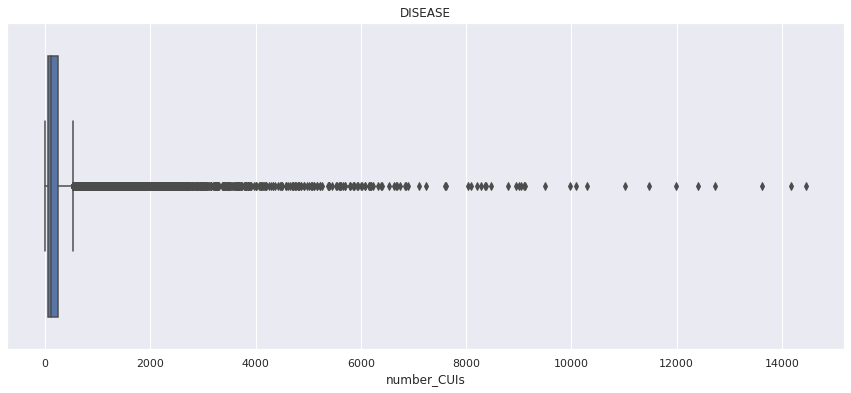

In [4]:
df_disease=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='DISEASE')]
print(df_disease.shape)

df_disease_Pivot=df_disease.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_disease_Pivot['term']=[','.join(map(str, l)) for l in df_disease_Pivot['list_CUIs']]
df_disease_Pivot['number_CUIs']=df_disease_Pivot['list_CUIs'].str.len()
print(df_disease_Pivot.shape)
df_disease_Pivot


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_disease_Pivot['number_CUIs']).set(title='DISEASE')

(24275, 4)


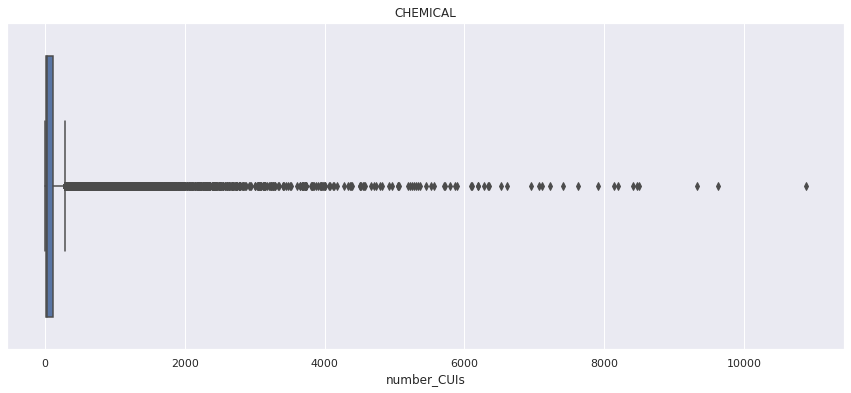

In [7]:
df_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories)) & (df['label']=='CHEMICAL')]
df_CHEMICAL.shape

df_CHEMICAL_Pivot=df_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_CHEMICAL_Pivot['list_CUIs']]
df_CHEMICAL_Pivot['number_CUIs']=df_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_CHEMICAL_Pivot.shape)



sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_CHEMICAL_Pivot['number_CUIs']).set(title='CHEMICAL')
del df_CHEMICAL

(24543, 4)


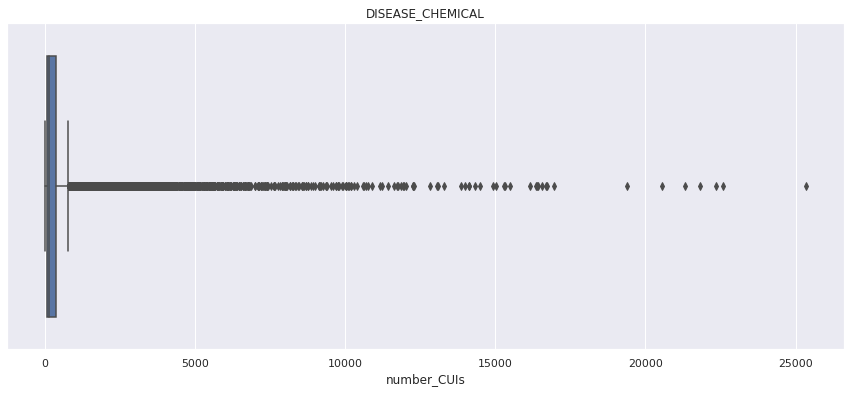

In [8]:
df_DISEASE_CHEMICAL=df[(df['category_Inner'].isin(ls_Categories))]
df_DISEASE_CHEMICAL.shape

df_DISEASE_CHEMICAL_Pivot=df_DISEASE_CHEMICAL.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_DISEASE_CHEMICAL_Pivot['term']=[','.join(map(str, l)) for l in df_DISEASE_CHEMICAL_Pivot['list_CUIs']]
df_DISEASE_CHEMICAL_Pivot['number_CUIs']=df_DISEASE_CHEMICAL_Pivot['list_CUIs'].str.len()
print(df_DISEASE_CHEMICAL_Pivot.shape)


sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_DISEASE_CHEMICAL_Pivot['number_CUIs']).set(title='DISEASE_CHEMICAL')
del df_DISEASE_CHEMICAL

(20841, 4)


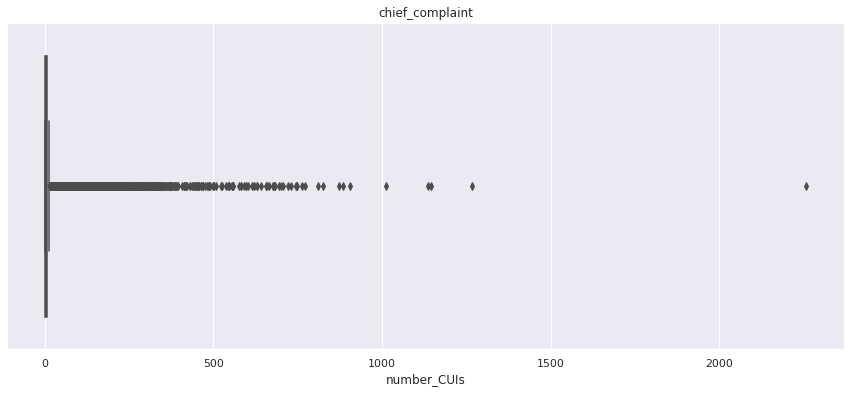

In [8]:
df_chief_complaint=df[(df['category_Inner']=='chief_complaint')]
df_chief_complaint.shape

df_chief_complaint_Pivot=df_chief_complaint.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_chief_complaint_Pivot['term']=[','.join(map(str, l)) for l in df_chief_complaint_Pivot['list_CUIs']]
df_chief_complaint_Pivot['number_CUIs']=df_chief_complaint_Pivot['list_CUIs'].str.len()
print(df_chief_complaint_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_chief_complaint_Pivot['number_CUIs']).set(title='chief_complaint')


(24012, 4)


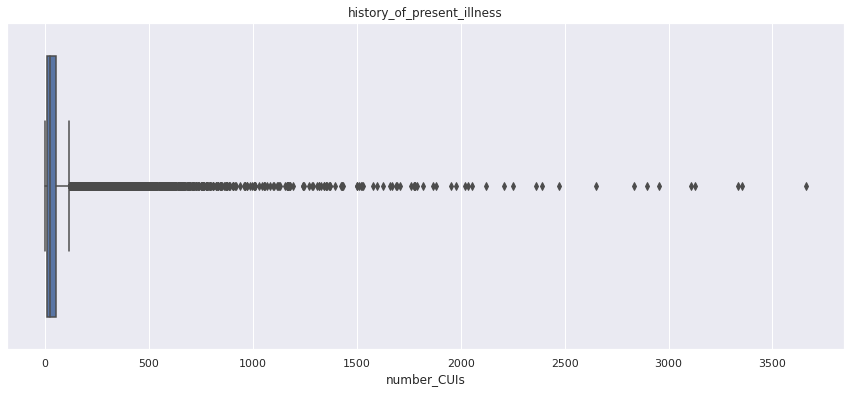

In [9]:
df_history_of_present_illness=df[(df['category_Inner']=='history_of_present_illness')]
df_history_of_present_illness.shape

df_history_of_present_illness_Pivot=df_history_of_present_illness.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_history_of_present_illness_Pivot['term']=[','.join(map(str, l)) for l in df_history_of_present_illness_Pivot['list_CUIs']]
df_history_of_present_illness_Pivot['number_CUIs']=df_history_of_present_illness_Pivot['list_CUIs'].str.len()
print(df_history_of_present_illness_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_history_of_present_illness_Pivot['number_CUIs']).set(title='history_of_present_illness')



(24234, 4)


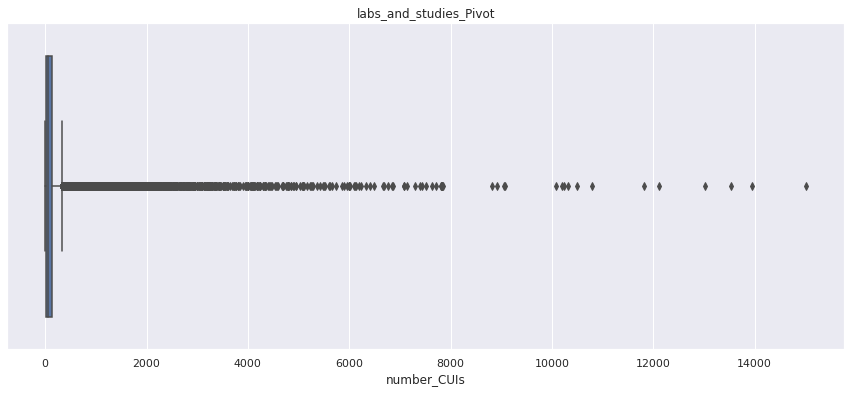

In [10]:
df_labs_and_studies=df[(df['category_Inner']=='labs_and_studies')]
df_labs_and_studies.shape

df_labs_and_studies_Pivot=df_labs_and_studies.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_labs_and_studies_Pivot['term']=[','.join(map(str, l)) for l in df_labs_and_studies_Pivot['list_CUIs']]
df_labs_and_studies_Pivot['number_CUIs']=df_labs_and_studies_Pivot['list_CUIs'].str.len()
print(df_labs_and_studies_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_labs_and_studies_Pivot['number_CUIs']).set(title='labs_and_studies_Pivot')



(24067, 4)


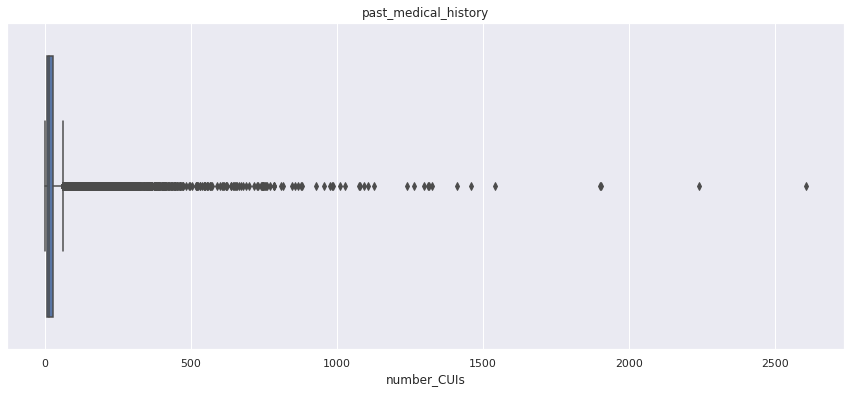

In [10]:
df_past_medical_history=df[(df['category_Inner']=='past_medical_history')]
df_past_medical_history.shape

df_past_medical_history_Pivot=df_past_medical_history.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_past_medical_history_Pivot['term']=[','.join(map(str, l)) for l in df_past_medical_history_Pivot['list_CUIs']]
df_past_medical_history_Pivot['number_CUIs']=df_past_medical_history_Pivot['list_CUIs'].str.len()
print(df_past_medical_history_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_past_medical_history_Pivot['number_CUIs']).set(title='past_medical_history')

del df_past_medical_history


(22515, 4)


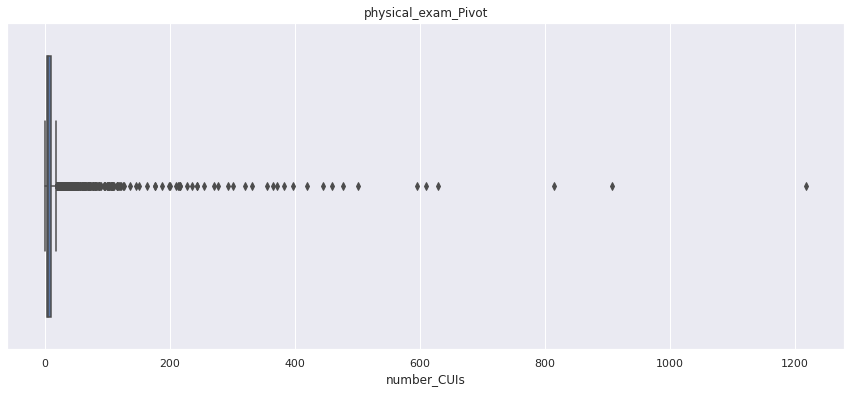

In [11]:
df_physical_exam=df[(df['category_Inner']=='physical_exam')]
df_physical_exam.shape

df_physical_exam_Pivot=df_physical_exam.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_physical_exam_Pivot['term']=[','.join(map(str, l)) for l in df_physical_exam_Pivot['list_CUIs']]
df_physical_exam_Pivot['number_CUIs']=df_physical_exam_Pivot['list_CUIs'].str.len()
print(df_physical_exam_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_physical_exam_Pivot['number_CUIs']).set(title='physical_exam_Pivot')

del df_physical_exam


(23915, 4)


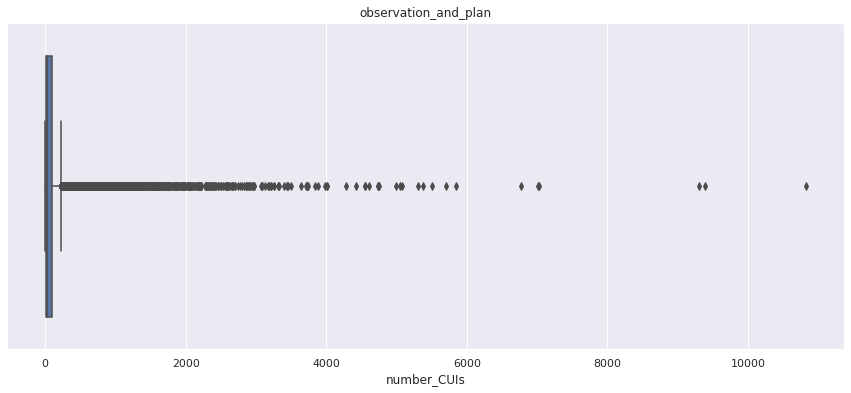

In [12]:

df_observation_and_plan=df[(df['category_Inner']=='observation_and_plan')]
df_observation_and_plan.shape

df_observation_and_plan_Pivot=df_observation_and_plan.groupby('HADM_ID')['Neg_CUI'].apply(list).reset_index(name='list_CUIs')
df_observation_and_plan_Pivot['term']=[','.join(map(str, l)) for l in df_observation_and_plan_Pivot['list_CUIs']]
df_observation_and_plan_Pivot['number_CUIs']=df_observation_and_plan_Pivot['list_CUIs'].str.len()
print(df_observation_and_plan_Pivot.shape)

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,6)})
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_observation_and_plan_Pivot['number_CUIs']).set(title='observation_and_plan')

del df_observation_and_plan


In [9]:
del df

#TF_IDF

In [10]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

Section



1.   df_history_of_present_illness_Pivot
2.   df_chief_complaint_Pivot
3.   df_labs_and_studies_Pivot
4.   df_past_medical_history_Pivot
5.   df_physical_exam_Pivot
6.   df_observation_and_plan_Pivot

label


1.   df_DISEASE_CHEMICAL_Pivot
2.   df_CHEMICAL_Pivot
3.   df_disease_Pivot





In [20]:
df_CHEMICAL_Pivot.head(1)
df_temp=df_CHEMICAL_Pivot

In [21]:
ls_HADM_ID=df_temp.HADM_ID.unique().tolist()
cui_dictionary = dict(zip(ls_HADM_ID,df_temp.term.tolist()))
corpus=cui_dictionary

In [22]:
cvect = CountVectorizer()
counts = cvect.fit_transform(corpus.values())
normalized_counts = normalize(counts, norm='l2', axis=1)

vectorizer = TfidfVectorizer()
tfs = vectorizer.fit_transform(corpus.values())
new_tfs = normalized_counts.multiply(vectorizer.idf_)

feature_names=vectorizer.get_feature_names_out()

corpus_index = [n for n in corpus]
df1 = pd.DataFrame(new_tfs.T.todense(), index=feature_names, columns=corpus_index)

In [23]:
df1.sort_values(by=[100001],ascending=False)

,100001,100003,100009,100010,100011,100012,100016,100018,100020,100024,...,198606,198678,198736,198738,198762,199236,199336,199557,199743.0,199987.0
c1314782,2.668734,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c0039328,2.477894,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c0074722,1.279610,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c2239486,0.999736,0.0,0.0,0.0,0.0,0.0,1.548785,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.434663,0.0,0.0,0.000000,0.51436,0.0,0.0
c0004057,0.930916,0.0,0.0,0.0,0.0,0.0,0.000000,0.036712,0.0,0.0,...,0.0,0.0,0.211718,0.000000,0.0,0.0,0.827182,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c0227073,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c0227085,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c0227098,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0
c0227170,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0


In [24]:
ls_TFIDF=[]
i=0
for item in ls_HADM_ID:
    
    print(len(ls_HADM_ID)-i)
    i=i+1
    mydata_new = df1.loc[:, df1.columns.isin([item])]
    mydata_new=mydata_new.sort_values(by=item,ascending=False)
    f=mydata_new.iloc[:, [0]]
    f.rename(columns={f.columns[0]: 'a'}, inplace=True)
    
    ls_TFIDF.append([item,','.join([str(elem) for elem in f[f['a']>0].index.tolist()]) ] )

Streaming output truncated to the last 5000 lines.
5000
4999
4998
4997
4996
4995
4994
4993
4992
4991
4990
4989
4988
4987
4986
4985
4984
4983
4982
4981
4980
4979
4978
4977
4976
4975
4974
4973
4972
4971
4970
4969
4968
4967
4966
4965
4964
4963
4962
4961
4960
4959
4958
4957
4956
4955
4954
4953
4952
4951
4950
4949
4948
4947
4946
4945
4944
4943
4942
4941
4940
4939
4938
4937
4936
4935
4934
4933
4932
4931
4930
4929
4928
4927
4926
4925
4924
4923
4922
4921
4920
4919
4918
4917
4916
4915
4914
4913
4912
4911
4910
4909
4908
4907
4906
4905
4904
4903
4902
4901
4900
4899
4898
4897
4896
4895
4894
4893
4892
4891
4890
4889
4888
4887
4886
4885
4884
4883
4882
4881
4880
4879
4878
4877
4876
4875
4874
4873
4872
4871
4870
4869
4868
4867
4866
4865
4864
4863
4862
4861
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4849
4848
4847
4846
4845
4844
4843
4842
4841
4840
4839
4838
4837
4836
4835
4834
4833
4832
4831
4830
4829
4828
4827
4826
4825
4824
4823
4822
4821
4820
4819
4818
4817
4816
4815
4814
4813
4812
4811

In [25]:
df2=pd.DataFrame(ls_TFIDF,columns=['HADM_ID','TFIDF'])
df2['list_CUIs'] =df2['TFIDF'].str.split(',')

df2.head()

,HADM_ID,TFIDF,list_CUIs
0,100001,"c1314782,c0039328,c0074722,c2239486,c0004057,c...","[c1314782, c0039328, c0074722, c2239486, c0004..."
1,100003,"c0013030,c0733815,c0030705,c0017887,c0876139,c...","[c0013030, c0733815, c0030705, c0017887, c0876..."
2,100009,"c0972395,c1276764,c0001905,c0027051,c0086787,c...","[c0972395, c1276764, c0001905, c0027051, c0086..."
3,100010,"not_c0699142,c0027270","[not_c0699142, c0027270]"
4,100011,"c0030899,c0004749,c0017887","[c0030899, c0004749, c0017887]"


In [26]:
df2['number_CUIs']= df2['list_CUIs'].str.len()

In [27]:
df2.to_csv('/content/drive/MyDrive/PaperA3/TFIDF/L2_G00_df_CHEMICAL_Pivot')
del df_CHEMICAL_Pivot


#Create DataSet

In [15]:
df_diagnosis=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Final_L1.csv')

In [16]:
dd=pd.read_csv('/content/drive/MyDrive/PaperA3/Diagnoses_labels/Dictionary.csv')
dictionary = dict(zip(dd.first_cuid, dd.canonical_name))

In [40]:

import ast
def complex_function( ini_list):

    
    tms_text=''
    try:
      for i in ini_list:
        
        if(i.upper().startswith("NOT_")):
          tms_text=tms_text +'NOT_'+dictionary[i[4:].upper()] +','
        else:
          tms_text=tms_text +dictionary[i.upper()] +','  
    except :
          print(i)    
    return tms_text 

In [41]:
complex_function(['c0011880', 'c0042963', 'c0011882', 'c0152020', 'c0277910', 'c0022658', 'c0259749', 'c2316401', 'c0080179', 'c0033687', 'c0020651', 'not_c0238106', 'c0027497', 'c0035309', 'c0403447', 'c0018926', 'not_c0009938', 'c0241863', 'c1561643', 'c0085593', 'not_c0000768', 'c0011991', 'c0020538', 'not_c0034063', 'not_c0032285', 'c0013404', 'not_c0032227', 'c0002893', 'c0030193', 'not_c0013604'])

'Diabetic Ketoacidosis,Vomiting,Diabetic Neuropathies,Gastroparesis,Ejection Murmurs,Kidney Diseases,Autonomic neuropathy,Chronic kidney disease stage 1,Spinal Fractures,Proteinuria,Hypotension, Orthostatic,NOT_Clostridium difficile colitis,Nausea,Retinal Diseases,Chronic Kidney Insufficiency,Hematemesis,NOT_Contusions,diabetic,Chronic Kidney Diseases,Chills,NOT_Congenital Abnormality,Diarrhea,Hypertensive disease,NOT_Pulmonary Edema,NOT_Pneumonia,Dyspnea,NOT_Pleural effusion disorder,Refractory anemias,Pain,NOT_Edema,'

In [42]:
df2['Text'] = df2.apply(lambda x: complex_function(x['list_CUIs']), axis=1)
df2.head()

,HADM_ID,TFIDF,list_CUIs,number_CUIs,Text
0,100001,"c0011880,c0042963,c0011882,c0152020,c0277910,c...","[c0011880, c0042963, c0011882, c0152020, c0277...",30,"Diabetic Ketoacidosis,Vomiting,Diabetic Neurop..."
1,100003,"c0023890,c0038354,c0020649,c0003962,not_c00148...","[c0023890, c0038354, c0020649, c0003962, not_c...",98,"Liver Cirrhosis,Stomach Diseases,Hypotension,A..."
2,100009,"c0002962,c0344315,c0042514,not_c0233568,c00287...","[c0002962, c0344315, c0042514, not_c0233568, c...",46,"Angina Pectoris,Depressed mood,Tachycardia, Ve..."
3,100010,"c0007134,c0018965,c1262477,c0439650,c0038984,c...","[c0007134, c0018965, c1262477, c0439650, c0038...",17,"Renal Cell Carcinoma,Hematuria,Weight decrease..."
4,100011,"c0016658,c0752219,c0029423,c0015802,c0347625,c...","[c0016658, c0752219, c0029423, c0015802, c0347...",77,"Fracture,Diffuse Axonal Injury,Cartilaginous e..."


In [43]:
df2 = df2.rename(columns={'label': 'HADM_ID'})


NameError: ignored